# Pedicting Boston Housing Prices

In this project I will use the Boston Housing MArket Data-cet to train a price-predicting model. I will first explore the data and determine a descriptive statistics about the data set. I will then split the data to training, corss-validation, and testing sets and use different perfomance graphs to find the best model. 

Our data-set has 489 points and 4 variables. The following is a summary of each variable:<br> 

**1.** RM: average number of rooms per dwelling (independent variable)<br>
**2.** LSTAT: percentage of population considered lower status (independent variable)<br>
**3.** PTRATIO: pupil-teacher ratio by town (independent variable)<br>
**4.** MEDV: median value of owner-occupied homes (dependent variable)<br>

To design a model for predicting median values of homes, we will need to separate the target variable (i.e. MEDV) and the independent variables (i.e. RM,LSTAT,PTRATIO). These two sets are stored in "features" and "prices" ,resepactively below: 

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


In [4]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


Now we will go ahead and calculate some basic descriptive statistics for home prices: 

In [9]:
# Minimum price of the data
minimum_price = np.array(prices).min()

# Maximum price of the data
maximum_price = np.array(prices).max()

# Mean price of the data
mean_price = np.array(prices).mean()

# Median price of the data
median_price = np.median(np.array(prices))

# Standard deviation of prices of the data
std_price = np.array(prices).std()

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


# 1. Feature Observation

Intuitively, we expect to see that home prices increase as the number of rooms increases. Also, we expect to have lower prices of homes where the percantage of lower class worker is larger. the ratio of students to teachers (i.e.PTRATIO) may be seen as a socio-economic indicator of a neighborhood as well. It might make sense to assume that neighborhoods with lower ratio of student to teacher are more expensive. We can now go beyong intuition and see the associations between different variables:

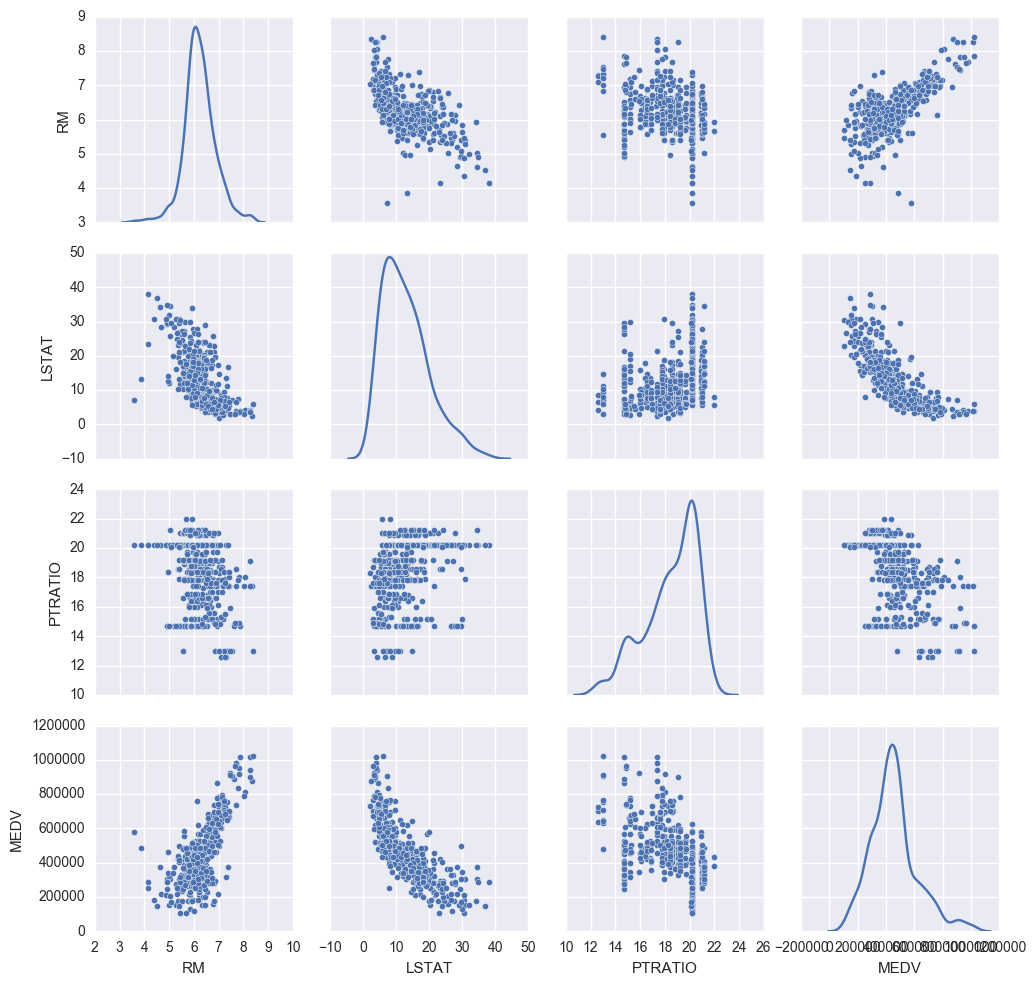

In [17]:
import seaborn as sns
import seaborn
g = sns.pairplot(data, diag_kind="kde")

# 2. Define a Performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

In [18]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """   
    #Calculate the performance score between 'y_true' and 'y_predict'
    score =r2_score(y_true, y_predict) 
    # Return the score
    return score

# 3. Goodness of Fit

We can now test our function defined in previous step on hypothetical sets of y_predict and y_true. 

In [19]:
# Calculate the performance of this model
y_true = [3, -0.5, 2, 7, 4.2]
y_predict = [2.5, 0.0, 2.1, 7.8, 5.3]
score = performance_metric(y_true,y_predict)
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


and r-square of 0.923 means that our hypothetical model which ahs predicted the y_pred list, is capable of explaining 92.3% of the variance in the true dataset (i.e. y_true). an R-square of 0.923 looks to be fairly good as it's close to one. However, we only have 5 data points and we need more to make sure that this model is capable of capture the variance in the dataset. 

# 4. Shuffle and Split Data

We will next take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset. By setting the random state on any number, we will make sure that the data has been shuffled before being assigned to test and train set. This way we will avoid any unforeseen ordering biased in the data-set. 

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=20)
print X_train.shape, X_test.shape

(391, 3) (98, 3)


# 5. Training and Testing

Why did we split the data-set to train and test set? by leaving a portion of the data set out of our analysis (i.e. the 20% test set) we will have the chance to test the final model that we fit in our training set on the test set and check if our model is capable of predicting an unseen data-set. In other words, the test set enables us to check if our model is under-fit  (high bias) or over-fit (high variance). One of the major challenges in predicting models is creating a balance between variance and bias, which is achieved by testing the model derived from the train set on the test set. 

# 6. Analyzing Model Performance

In this section we'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, we'll investigate one particular algorithm with an increasing $max-depth$ parameter on the full training set to observe how model complexity affects performance. Graphing our model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

# 7. Learning Curves

The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R-squared, the coefficient of determination.

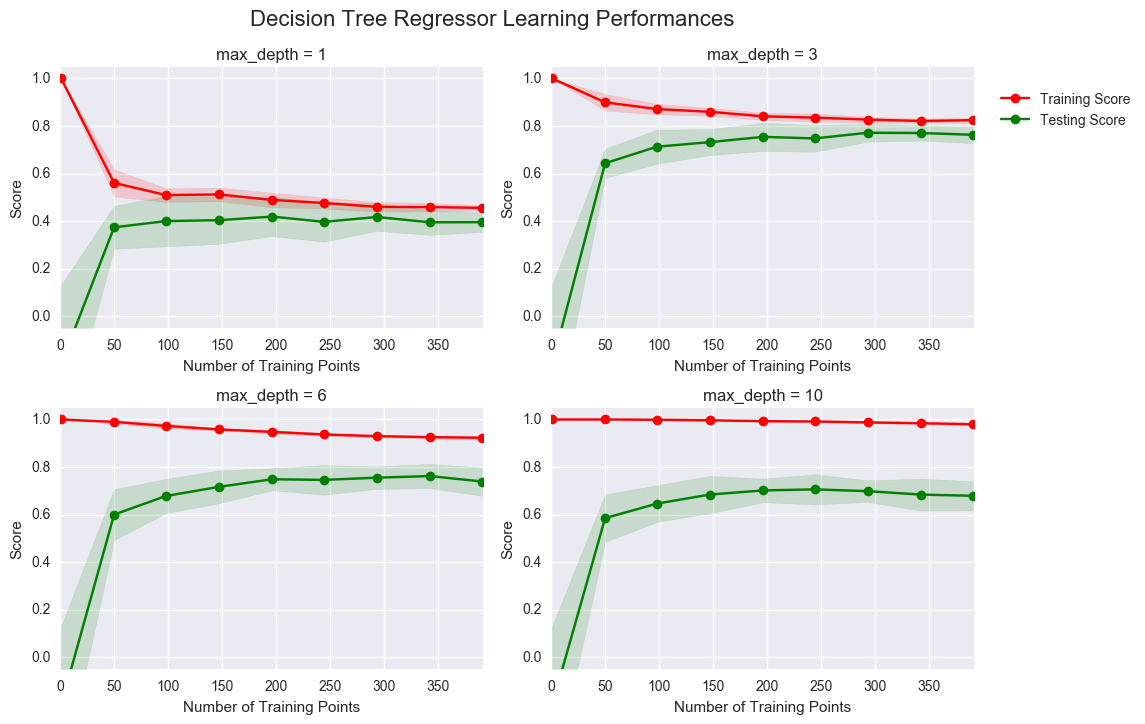

In [26]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

The graphs above are intended to show us the right sizes of training sets for different $max-depth$ values for the decision tree regressor. Max-depth can be thought of as the number of questions that decisoin tree model asks to regress the data. For example, in the top-right graph the max-depth is $3$ which means that the tree diverges to smaller branches 3 times. In this graph we can see that as we increase the number of training points the learning score increases verging on 0.8. However, the learning curve converges after 300. That is, increasing the number of training points does not increase the learning score. We can see that the testing curve's score also increases as we add more data points. In both training and testing curves uncertainty decreases by adding more points. However, in both sets the learning curves do not imprve after 300 and the two lines become almost parallel thereafter. At this point, adding more data points does not increase the leearning score and only increases the runtime. 

# 8. Complexity Curves

The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

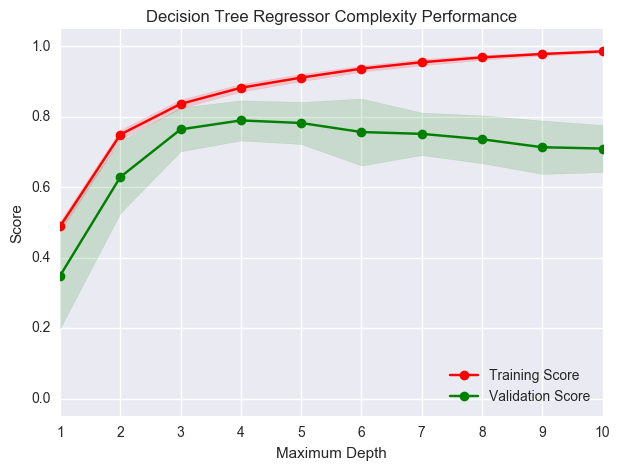

In [27]:
vs.ModelComplexity(X_train, y_train)

As we can see in the complexity graph, a decision tree model with $max-depth =1$ suffers from a high bias as both the training and validation scores are pretty low. As we increase the max-depth the score for the training set increases, which is natural as we are increasing the variance of the model and this will increase the R-square. However, as we can see the validation score starts to gradually drop after max_depth = 4 due to over fitting, that is, the model after this point will not be externally valid and cannot predict unseen data accurately. At max-depth =10, the model suffers from high variance which results in an over-fit model. 

# 9. Best-Guess Optimal Model

It looks like the model with max-depth = 4 is the optimal model, according to the complexity graph. the reason is that the validation score is at its' pick in this stage which means that it's the best balance between bias and variance. if we go lower than 4, the model will be suffering from high biasas both the training set and validation set will have lower scores. If we go hier than 4, although the training score increases, we can see a decrease in the validation score, which is due to being over-fit. Therefore, the best model has a max-depth of 4. 

# 10. Evaluating Model Performance

Lastly, we will construct a model and make a prediction on the client's feature set using an optimized model from fit_model. Most of the regression and classification models have many parameters to be set for the model. Finding an optimum set of parameters for every model (i.e. which is called tuning) may take a long time as the number of these parameters increase. For example, SVM model, which is a classification model has many parameters some of which are C (float), degree (integer), gamma (float), and Kernel ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed'). As these paramaters may greatly impact the final results, one should choose them carefully. Grid search assists us to tray a variety of parameters in a timely fashion and choose an optimal model. 

# 11. Cross-Validation

K-fold cross validation is intended to minimize the accidental biases in the training and validation sets. In the method, we divide up the training set into k subgroups, set one of the subgroups as the validation set and the other k-1 subgroups will constitute the training set. We repeat this process k times untill every subgroup is test set for once. We calculate the error in every step of the k steps and then avergae them all. This way we have minimized the selection bias for validation sets. 

While the grid-search method enables us to examine a varity of parameters, not using k-fold cross validation will lead to tuning the model on only a subset of the data. To minimize this bias, therefore, we use cross-validation methods such as k-fold to tune the parameters across all the data points and not only a subset of them.  

# 12. Fitting a Model

Our final implementation requires that we bring everything together and train a model using the decision tree algorithm. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. 

In addition, we will use ShuffleSplit() for an alternative form of cross-validation (see the 'cv_sets' variable). While it is not the K-Fold cross-validation technique we described earlier, this type of cross-validation technique is just as useful! The ShuffleSplit() implementation below will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set. 

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    #Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    #Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

# 13. Making Predictions

Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

# 14. Optimal Model

In [29]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


As we can see the optimal model has a max-depth of 4 which is what I had predicted based on the complexity graph. 

# 15. Predicting Selling Prices

We will now predict the housing prices for three clients using the model we selected in the last step. Imagine we have three cases: 

In [37]:
clients = pd.DataFrame([[5,4,8],[17,32,3], ["15-to-1","22-to-1","12-to-1"]])
clients["Feature"] = ["Total number of rooms in home","Neighborhood poverty level (as %)","Student-teacher ratio of nearby schools"]
clients.columns = ["Client1","Client2","Client3","Feature"]
clients = clients[["Feature","Client1","Client2","Client3"]]
clients

,Feature,Client1,Client2,Client3
0,Total number of rooms in home,5,4,8
1,Neighborhood poverty level (as %),17,32,3
2,Student-teacher ratio of nearby schools,15-to-1,22-to-1,12-to-1


In [30]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $306,337.50
Predicted selling price for Client 2's home: $224,342.55
Predicted selling price for Client 3's home: $930,490.91


According to these results we can recommend \$306,337.50, \$224,342.55, and \$930,490.91 to client 1,2, and 3 respectively. These numbers do sound reasonable. As we saw in section 1 (i.e. Feature Observation) home prices have a positive correlation with the room number with minimum being around 4 and maximum being around 9. As we can see in the plot, most of the 4 (i.e. client2) and 5 rooms (i.e. client 1) are around 200k and 400k whereas the 8 (i.e. client3) room apartments are mostly above 800k. It is important to note that the 4 bedroom is in a rather poor neighborhoo. Again, as we see in the plot most of the houses located in poor neighborhoods are are between 200k and 400k. Client1's house is in a medium level income where houses are around 300k to 600k  with rather low number of rooms and therefore 306k makes sense for this client. At last, client 3 is in an affluent neighborhood with large number of rooms. The scatter plots for both RM and LSTAT with MEDV shows that these houses range between 800k and 1M which again, shows that our prediction is reasonable. 

# 16. Sensitivity

An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. We will run the code cell below to run the fit_model function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [38]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


# 17. Applicability

It is important to note that the model that we constrcuted in tehse steps should not be used in a real-word setting. There are many limitations to this model: first, the data-set belongs to 1978, almost 4 decaes ago. The U.S. has gone through multiple recessions since then and cities have significantly changed, which in part, affect the market. Accordingly a more up-t-date data-set is reuiqred. Second, This model has been trained for Boston and cannot be used for other cities as Boston's housing market has its own specificities. Third, although the features we analysed may be important to this date, there are other features affecting housing prices that we entirely ignored such as square footage area, accessability, design and materials, building age, etc. Of course, adding all these features would require more steps to find the optimal model, however, having these variables enables us to provide more accurate predictions. At last, as out sensitivity test showed above, the model suffers from a low sensitivity. As we examined the model for a client 10 times we got significantly different reasults within the range of 69k. One reason to this low sensitivity may be that we only tried regression tree and did not try any other model. In a real-word machine learning problem we often try multiple models and choose the best one, using some measuring tool such as F1 score. In summary, including more recent data points, for different types of neighbrohoods in Boston, considering more features, and examining different regressors will enable us to improve the reliability and accuracy of our predictions for today's Boston Market. 